# Метрики модели

In [1]:
from sklearn.metrics import classification_report
from src.packages.loaders import ModelLoader
from notebooks.open_datasets.russian_inappropriate_messages.common import path_to_data, path_to_models
from src.packages.loaders import DataLoader
from rich.jupyter import print
import time


def make_text_green_bold(text: str) -> str:
    return "[green bold]" + text + "[/]"


data = DataLoader.load_pandas_dataframe(path_to_data / 'all_patterns_and_its_intents_test.csv')
train_x = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "train_x_dense_for_perceptron.npy")
train_y = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "train_y_dense_for_perceptron.npy")
test_x = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "test_x_dense_for_perceptron.npy")
test_y = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "test_y_dense_for_perceptron.npy")

data = data.rename(columns={'intent': 'true_intent'})
data

pattern       true_intent
0      Уже давно почти никакие, убийства части вторые...     offline_crime
1      Я просто буду протестовать против расизима пол...     offline_crime
2      Как думаете, корейца расстреляют за то, что ег...     offline_crime
3      похож на одного поца, которого мы сейчас в теч...     offline_crime
4          Еще и Сердюков был. Табуреточник и налоговик.     offline_crime
...                                                  ...               ...
24992  Странные у вас отношения!Такие решения самосто...  social_injustice
24993  оставайтесь в государственном пенсионном фонде...  social_injustice
24994  В отпуске по уходу за ребенком я получала NUMB...  social_injustice
24995  При смерти страны всегда только в столице жить...  social_injustice
24996     без образования буш  в день получать до пенсии  social_injustice

[24997 rows x 2 columns]

In [2]:
import tensorflow as tf

unique_sorted_intents = DataLoader.load_numpy_array(path_to_data / "unique_sorted_intents.npy")
model_4 = ModelLoader.load(path_to_models / "sbert_and_perceptron" / "perceptron_4.h5")
model_4

In [3]:
import numpy as np

dense_tensor_test = np.array([x.numpy() for x in test_x])
dense_tensor_train = np.array([x.numpy() for x in train_x])
dense_tensor_train

array([[-0.2594728 , -0.60044813, -0.39851883, ..., -0.3670128 ,
        -0.3340717 , -0.3499126 ],
       [ 0.39574736, -1.0346919 ,  0.09063911, ..., -0.4454708 ,
         0.06091923,  0.42845067],
       [ 0.3674083 , -0.3066017 , -0.17399396, ..., -0.48750213,
         0.39706594,  0.0611933 ],
       ...,
       [ 0.00884132, -0.16324571,  0.20688833, ...,  0.18000361,
        -0.04088392, -0.17240533],
       [-0.50505704, -0.5671449 , -0.3849291 , ...,  0.00754684,
        -0.14070836,  0.25053844],
       [ 0.20709492, -0.2258115 ,  0.48218024, ..., -0.73097557,
         0.96465725,  0.5079209 ]], dtype=float32)

In [4]:
train_y_pred_4 = model_4.predict(dense_tensor_train)
test_y_pred_4 = model_4.predict(dense_tensor_test)
train_y_pred_4

782/782 [==============================] - 1s 950us/step


array([[5.1525794e-04, 1.3376205e-03, 1.5707790e-03, ..., 6.4524333e-03,
        9.1130631e-03, 9.6387291e-01],
       [8.3584592e-02, 2.9818697e-03, 3.5054024e-02, ..., 9.3309492e-02,
        2.7965002e-02, 8.6199559e-02],
       [1.7083126e-04, 9.8368269e-01, 1.3790420e-03, ..., 6.6853804e-04,
        9.4277266e-04, 4.6892031e-03],
       ...,
       [5.5037548e-05, 1.3625041e-04, 2.2925062e-03, ..., 2.7376192e-04,
        3.8447231e-04, 9.9390382e-01],
       [1.4057849e-04, 7.2761928e-04, 3.0382420e-04, ..., 6.1976496e-04,
        1.4945477e-02, 9.7350162e-01],
       [1.6143279e-03, 3.4242671e-04, 6.3170227e-03, ..., 1.0764118e-02,
        1.5468743e-02, 3.6890872e-03]], dtype=float32)

In [5]:
import numpy as np

train_y_classes = unique_sorted_intents[np.argmax(train_y, axis=1)]
test_y_classes = unique_sorted_intents[np.argmax(test_y, axis=1)]
train_y_pred_classes_4 = unique_sorted_intents[np.argmax(train_y_pred_4, axis=1)]
test_y_pred_classes_4 = unique_sorted_intents[np.argmax(test_y_pred_4, axis=1)]

train_y_classes

array(['weapons', 'body_shaming', 'drugs', ..., 'weapons', 'weapons',
       'sexual_minorities'], dtype=object)

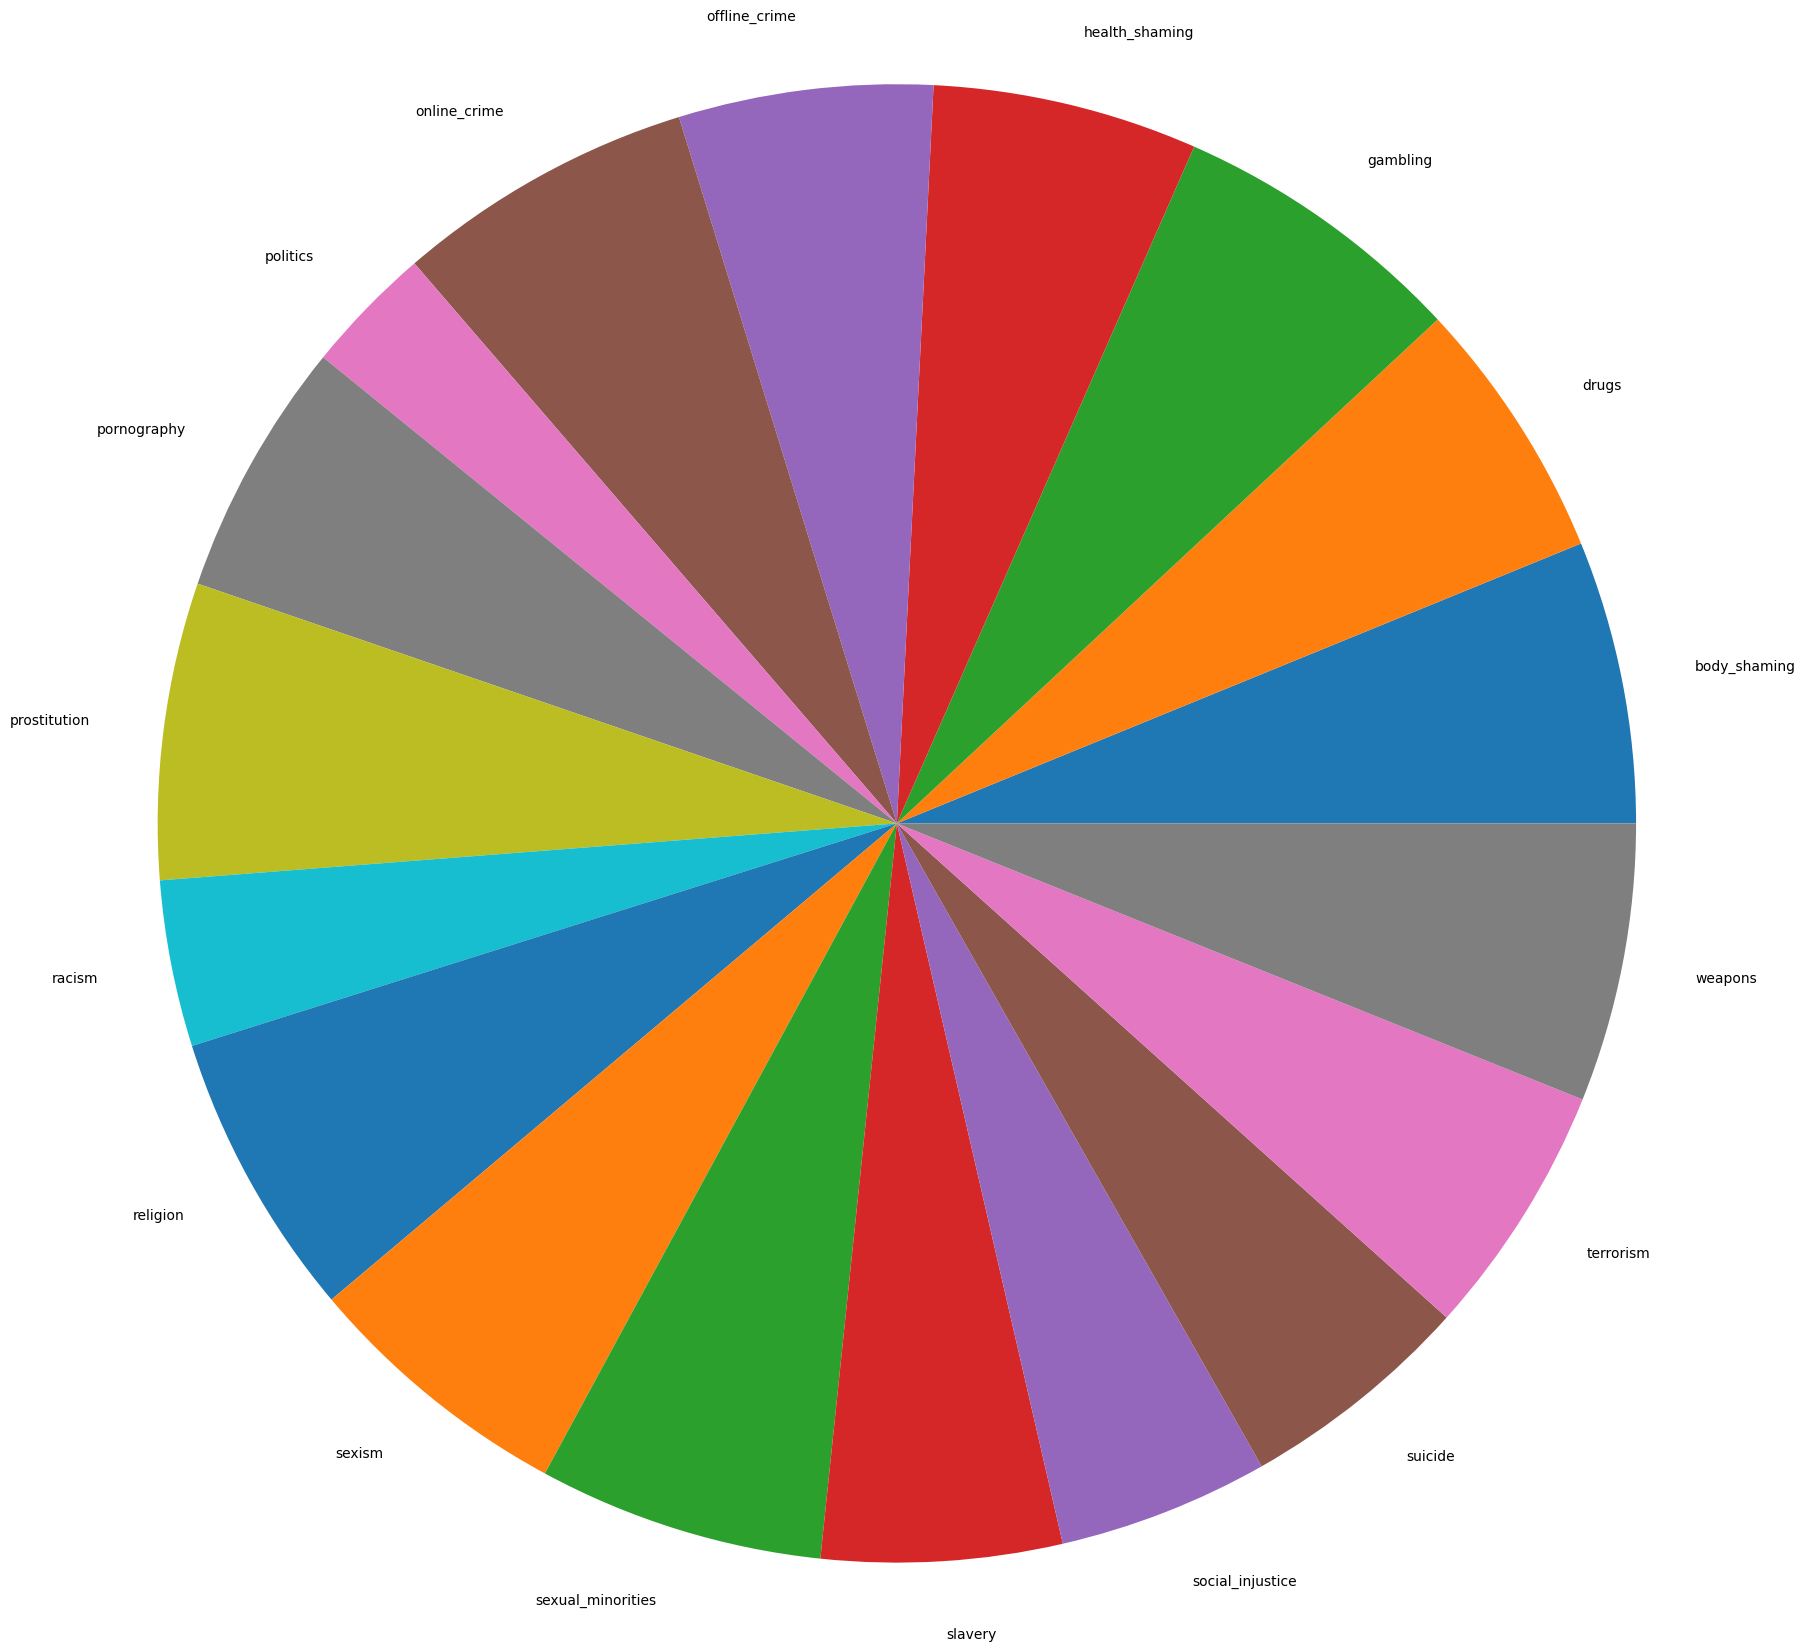

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = np.unique(train_y_classes, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

In [7]:
class_counts = np.unique(train_y_pred_classes_4, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

In [8]:
print(classification_report(train_y_classes, train_y_pred_classes_4, zero_division=0))
print(classification_report(test_y_classes, test_y_pred_classes_4, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.72      0.72      0.72      6161
            drugs       0.79      0.79      0.79      5738
         gambling       0.69      0.69      0.69      6454
   health_shaming       0.78      0.82      0.80      5777
    offline_crime       0.63      0.59      0.61      5536
     online_crime       0.78      0.82      0.80      6534
         politics       0.64      0.59      0.61      2814
      pornography       0.62      0.55      0.58      5583
     prostitution       0.60      0.60      0.60      6465
           racism       0.63      0.65      0.64      3627
         religion       0.80      0.86      0.83      6252
           sexism       0.69      0.79      0.74      5943
sexual_minorities       0.65      0.62      0.63      6227
          slavery       0.63      0.59      0.61      5238
 social_injustice       0.73      0.67      0.70      4595
          suicide       0.72      0.68      0.70      5117
        terrorism       0.69      0.73      0.71      5542
          weapons       0.70      0.73      0.72      6072

         accuracy                           0.70     99675
        macro avg       0.69      0.69      0.69     99675
     weighted avg       0.70      0.70      0.70     99675

precision    recall  f1-score   support

     body_shaming       0.68      0.70      0.69      1547
            drugs       0.76      0.75      0.76      1401
         gambling       0.63      0.63      0.63      1605
   health_shaming       0.74      0.80      0.77      1456
    offline_crime       0.60      0.53      0.56      1409
     online_crime       0.75      0.77      0.76      1606
         politics       0.59      0.57      0.58       713
      pornography       0.56      0.50      0.53      1399
     prostitution       0.54      0.54      0.54      1648
           racism       0.55      0.59      0.57       893
         religion       0.78      0.84      0.81      1631
           sexism       0.65      0.73      0.69      1459
sexual_minorities       0.60      0.56      0.58      1557
          slavery       0.58      0.54      0.56      1350
 social_injustice       0.67      0.61      0.64      1139
          suicide       0.67      0.67      0.67      1285
        terrorism       0.65      0.70      0.68      1392
          weapons       0.67      0.67      0.67      1505

         accuracy                           0.66     24995
        macro avg       0.65      0.65      0.65     24995
     weighted avg       0.65      0.66      0.65     24995

## Объединение двух моделей

In [9]:
data_dense_index_train = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "data_dense_index_train.npy")
data_dense_index_test = DataLoader.load_numpy_array(path_to_data / 'sbert_and_perceptron' / "data_dense_index_test.npy")
data_dense_index_train, data_dense_index_train.shape, data_dense_index_test.shape

(array([58063, 60196, 14797, ..., 55795, 57616, 87003], dtype=int64),
 (99675,),
 (24995,))

In [10]:
train_x = train_x[np.argsort(data_dense_index_train)]
train_y = train_y[np.argsort(data_dense_index_train)]
test_x = test_x[np.argsort(data_dense_index_test)]
test_y = test_y[np.argsort(data_dense_index_test)]

train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
dense_tensor_train = np.array([x.numpy() for x in train_x])
dense_tensor_test = np.array([x.numpy() for x in test_x])
dense_tensor_train

array([[ 0.23546457, -0.2726958 , -0.13700253, ...,  0.37586695,
         0.539714  ,  0.30967745],
       [ 0.8585134 ,  0.14612296, -0.7821668 , ..., -0.07630087,
        -0.05569288,  0.14775164],
       [ 0.32067293, -0.40162942,  0.64752567, ...,  0.35175136,
         0.50260425,  0.93542147],
       ...,
       [ 0.18732904, -0.1926121 , -0.12536964, ..., -0.29005954,
        -0.5374852 ,  0.5119272 ],
       [ 0.69124776, -0.38840497,  0.5745874 , ..., -0.15712397,
        -0.47552934,  0.28872657],
       [ 0.3869656 , -0.4579621 , -0.09408307, ...,  0.07229315,
        -0.2114896 ,  0.5927772 ]], dtype=float32)

In [12]:
data_sparse_index_train = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "data_sparse_index_train.npy")
data_sparse_index_test = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "data_sparse_index_test.npy")
data_sparse_index_train, data_sparse_index_train.shape, data_sparse_index_test.shape

(array([43144, 55072, 72516, ..., 86856, 73964, 58465], dtype=int64),
 (99675,),
 (24995,))

In [13]:
train_x_sparse = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "train_x_sparse_for_perceptron.npy")
test_x_sparse = DataLoader.load_numpy_array(path_to_data / 'perceptron' / "test_x_sparse_for_perceptron.npy")

train_x_sparse = train_x_sparse[np.argsort(data_sparse_index_train)]
test_x_sparse = test_x_sparse[np.argsort(data_sparse_index_test)]

train_x_sparse

array([<1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 10 stored elements in Compressed Sparse Row format>,
       <1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 19 stored elements in Compressed Sparse Row format>,
       <1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 10 stored elements in Compressed Sparse Row format>, ...,
       <1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 8 stored elements in Compressed Sparse Row format>,
       <1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 15 stored elements in Compressed Sparse Row format>,
       <1x97260 sparse matrix of type '<class 'numpy.float64'>'
       	with 8 stored elements in Compressed Sparse Row format>],
      dtype=object)

In [14]:
from scipy.sparse import vstack

train_x_sparse = vstack(train_x_sparse)
sparse_tensor_train = tf.sparse.SparseTensor(
    indices=list(zip(*train_x_sparse.nonzero())),  # индексы ненулевых элементов
    values=train_x_sparse.data,  # значения ненулевых элементов
    dense_shape=train_x_sparse.shape  # размерность разреженной матрицы
)
sparse_tensor_train = tf.sparse.reorder(sparse_tensor_train)

test_x_sparse = vstack(test_x_sparse)
sparse_tensor_test = tf.sparse.SparseTensor(
    indices=list(zip(*test_x_sparse.nonzero())),  # индексы ненулевых элементов
    values=test_x_sparse.data,  # значения ненулевых элементов
    dense_shape=test_x_sparse.shape  # размерность разреженной матрицы
)
sparse_tensor_test = tf.sparse.reorder(sparse_tensor_test)

sparse_tensor_train

SparseTensor(indices=tf.Tensor(
[[    0 16540]
 [    0 26510]
 [    0 26911]
 ...
 [99674 68536]
 [99674 80508]
 [99674 93620]], shape=(970078, 2), dtype=int64), values=tf.Tensor([0.36081231 0.31195985 0.23532773 ... 0.36117255 0.35099546 0.38885452], shape=(970078,), dtype=float64), dense_shape=tf.Tensor([99675 97260], shape=(2,), dtype=int64))

In [15]:
model_sparse = ModelLoader.load(path_to_models / "perceptron" / "perceptron_4.h5")
model_sparse

In [16]:
train_y_pred_5 = model_sparse.predict(sparse_tensor_train) \
                 + model_4.predict(dense_tensor_train)
test_y_pred_5 = model_sparse.predict(sparse_tensor_test) \
                + model_4.predict(dense_tensor_test)
train_y_pred_5

782/782 [==============================] - 1s 843us/step


array([[3.2332654e-03, 4.3368706e-04, 1.1544267e-03, ..., 3.7045367e-02,
        1.4658581e-02, 1.9483280e-03],
       [5.3834878e-03, 4.4006191e-02, 6.8730069e-03, ..., 4.6632192e-03,
        6.1975904e-02, 3.7870631e-02],
       [7.9106279e-03, 6.8358262e-03, 6.6143530e-03, ..., 8.4331030e-01,
        5.6683931e-02, 7.5692269e-03],
       ...,
       [3.2921168e-03, 2.9456024e-03, 3.6487259e-02, ..., 1.2079907e-02,
        2.3401293e-03, 2.8301217e-03],
       [1.6377281e-02, 6.4414092e-03, 2.5369944e-02, ..., 5.7810199e-01,
        3.7882466e-02, 9.9431491e-03],
       [3.2723136e-02, 2.9345602e-03, 4.8655879e-02, ..., 1.8126981e-02,
        2.9039674e-02, 4.1041160e-03]], dtype=float32)

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_y_pred_5 = scaler.fit_transform(train_y_pred_5)
train_y_pred_5[0]

array([1.6175113e-03, 2.1674053e-04, 5.7719025e-04, 5.5916340e-04,
       9.4764084e-01, 1.2011467e-03, 9.1024017e-04, 1.4713805e-03,
       9.1803810e-03, 7.7188900e-04, 3.6446413e-03, 6.6591462e-04,
       1.4773710e-03, 4.0261466e-03, 9.3108538e-04, 1.8525427e-02,
       7.3330998e-03, 9.7459083e-04], dtype=float32)

In [18]:
train_y_pred_classes_5 = unique_sorted_intents[np.argmax(train_y_pred_5, axis=1)]
test_y_pred_classes_5 = unique_sorted_intents[np.argmax(test_y_pred_5, axis=1)]
train_y_classes = unique_sorted_intents[np.argmax(train_y, axis=1)]
test_y_classes = unique_sorted_intents[np.argmax(test_y, axis=1)]
train_y_pred_classes_5

array(['offline_crime', 'offline_crime', 'offline_crime', ...,
       'social_injustice', 'social_injustice', 'social_injustice'],
      dtype=object)

In [19]:
print(classification_report(train_y_classes, train_y_pred_classes_5, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.81      0.88      0.85      6161
            drugs       0.91      0.91      0.91      5738
         gambling       0.86      0.81      0.83      6454
   health_shaming       0.88      0.90      0.89      5777
    offline_crime       0.82      0.71      0.76      5536
     online_crime       0.90      0.93      0.91      6534
         politics       0.78      0.72      0.75      2814
      pornography       0.81      0.71      0.76      5583
     prostitution       0.77      0.74      0.75      6465
           racism       0.78      0.76      0.77      3627
         religion       0.88      0.95      0.91      6252
           sexism       0.78      0.88      0.82      5943
sexual_minorities       0.85      0.82      0.84      6227
          slavery       0.80      0.77      0.79      5238
 social_injustice       0.81      0.81      0.81      4595
          suicide       0.88      0.90      0.89      5117
        terrorism       0.83      0.87      0.85      5542
          weapons       0.84      0.88      0.86      6072

         accuracy                           0.84     99675
        macro avg       0.83      0.83      0.83     99675
     weighted avg       0.84      0.84      0.84     99675

In [20]:
print(classification_report(test_y_classes, test_y_pred_classes_5, zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.70      0.80      0.74      1547
            drugs       0.83      0.83      0.83      1401
         gambling       0.71      0.70      0.70      1605
   health_shaming       0.79      0.83      0.81      1456
    offline_crime       0.68      0.56      0.61      1409
     online_crime       0.81      0.83      0.82      1606
         politics       0.65      0.60      0.63       713
      pornography       0.68      0.55      0.61      1399
     prostitution       0.61      0.59      0.60      1648
           racism       0.64      0.63      0.63       893
         religion       0.82      0.88      0.85      1631
           sexism       0.69      0.79      0.74      1459
sexual_minorities       0.75      0.71      0.73      1557
          slavery       0.66      0.62      0.64      1350
 social_injustice       0.68      0.69      0.68      1139
          suicide       0.77      0.81      0.79      1285
        terrorism       0.74      0.76      0.75      1392
          weapons       0.72      0.74      0.73      1505

         accuracy                           0.72     24995
        macro avg       0.72      0.72      0.72     24995
     weighted avg       0.72      0.72      0.72     24995

## Метрики быстродействия

In [21]:
from packages.loaders import DataLoader, ModelLoader
from notebooks.open_datasets.russian_inappropriate_messages.common import path_to_data, path_to_models
from src.packages.pipe.perceptron.preprocess_data import ToSentenceEmbeddingVectorPatternsSBert
from packages.pipe.common import NormalizationStep
from sklearn.pipeline import Pipeline, FeatureUnion
from src.packages.pipe.perceptron.preprocess_data import SparseTensorTransformer
from sklearn.pipeline import make_pipeline
from packages.pipe.common import ModelPrediction, ReshapeTransformer

preprocess_sentence = ModelLoader.load(path_to_models / 'pipelines' / 'preprocess_sentence.joblib')
fix_typos = ModelLoader.load(path_to_models / 'pipelines' / 'fix_typos.joblib')
encoder_for_patterns_dense = ToSentenceEmbeddingVectorPatternsSBert()
encoder_for_patterns_sparse = ModelLoader.load(
    path_to_models / 'pipelines' / 'perceptron' / 'tfidf_encoder_for_patterns.joblib')
primary_pretreatment_pipe = make_pipeline(preprocess_sentence,
                                          fix_typos)
to_predict_dense = make_pipeline(encoder_for_patterns_dense,
                                 ModelPrediction(model_4),
                                 ReshapeTransformer((-1, 1))
                                 )
to_predict_sparse = make_pipeline(encoder_for_patterns_sparse,
                                  SparseTensorTransformer(),
                                  ModelPrediction(model_sparse),
                                  ReshapeTransformer((-1, 1))
                                  )
perceptron_full_pipeline = Pipeline([
    ('primary_pretreatment_pipe', primary_pretreatment_pipe),
    ('to_predict', FeatureUnion([
        ('to_predict_dense', to_predict_dense),
        ('to_predict_sparse', to_predict_sparse)
    ])),
    ('normalization', NormalizationStep())
])

perceptron_full_pipeline

Pipeline(steps=[('primary_pretreatment_pipe',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('removegarbage',
                                                   RemoveGarbage()),
                                                  ('correctorthography',
                                                   CorrectOrthography(lang=['en',
                                                                            'ru'])),
                                                  ('removepunctuation',
                                                   RemovePunctuation()),
                                                  ('tokenize', Tokenize()),
                                                  ('tobaseform', ToBaseForm()),
                                                  ('removestopwords',
                                                   RemoveStopWords())])),
                                 ('fixtypos', FixTypos())])),
                ('to_...
                                                ('to_predict_sparse',
                                                 Pipeline(steps=[('totfidfvectorpatterns',
                                                                  ToTFIDFVectorPatterns(is_sparse=True)),
                                                                 ('sparsetensortransformer',
                                                                  SparseTensorTransformer()),
                                                                 ('modelprediction',
                                                                  ModelPrediction(model=<keras.engine.sequential.Sequential object at 0x000001E7E2511E40>)),
                                                                 ('reshapetransformer',
                                                                  ReshapeTransformer(shape=(-1,
                                                                                            1)))]))])),
                ('normalization', NormalizationStep())])

In [22]:
%%time

def predict_intent(sentence: str, pipeline, intents, threshold=0.45) -> list[dict]:
    intention_probability_vector = pipeline.transform(sentence)
    results = [(i, r) for i, r in enumerate(intention_probability_vector) if r > threshold]
    if len(results) == 0:
        return [{"intent": "NONE", "probability": 1.0}]
    results.sort(key=lambda x: x[1], reverse=True)

    results_list = []
    for r in results:
        results_list.append({"intent": intents[r[0]], "probability": round(float(r[1]), 2)})
    return results_list


sentence = "Он очень гордился своей коллекцией метательных ножей"
predict_intent(sentence, perceptron_full_pipeline, unique_sorted_intents)

CPU times: total: 5.08 s
Wall time: 3.98 s


[{'intent': 'weapons', 'probability': 0.99}]

In [24]:
from src.packages.path_storage import PathStorage
from loguru import logger

log_filename = (
        str(PathStorage.get_path_to_current_dir().relative_to(PathStorage.get_path_to_project_root())).replace("\\",
                                                                                                               "_") + ".log")
path_to_log = PathStorage.get_path_to_logs() / log_filename
logger.add(path_to_log,
           level="DEBUG",
           rotation="100 MB",
           compression="zip",
           enqueue=True
           )

1

In [44]:
data_sample = data.sample(frac=0.3)
data_sample

pattern        true_intent
14466    Пробиваемость по бетону не та же, что по броне.            weapons
6930   я мариновал свои яйца NUMBER лет, пользуясь сл...        pornography
1071   Не поверишь одна, МВД РФ называется. Это разны...      offline_crime
13500  Где бы такой достать, именно учебный? Я бы в к...            weapons
22057  Гейтис - неудивительно.Во-первых, Моффат был ш...  sexual_minorities
...                                                  ...                ...
13518  Так а кто сказал, что шлем должен на подбородк...            weapons
18420  То есть негры физически не способны бегать мед...             racism
2144   Могут ли менты, узнав мой I, удалённо лазить п...       online_crime
7316   У меня прошло два года всего, но я с трудом вс...        pornography
10770  Согласен, после такого надо либо прыгать с кры...            suicide

[7499 rows x 2 columns]

In [45]:
from tqdm import tqdm
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn' (появляется предупреждение при записи через .loc)

tqdm.pandas()

start = time.time()

batch_size = 500
batch_start = 0

for i in range(batch_start * batch_size, len(data_sample), batch_size):
    try:
        data_batch = data_sample.iloc[i:i + batch_size]
        pred_intents = data_batch['pattern'].progress_apply(
            lambda x: predict_intent(x, perceptron_full_pipeline, unique_sorted_intents, 0))
        data_batch.loc[:, 'pred_intents'] = pred_intents
        data_batch.loc[:, 'pred_intent'] = pred_intents.apply(lambda x: x[0].get("intent"))
        data_batch.to_csv(path_to_data / "sbert_and_perceptron" / f"data_pred_batch_{i}.csv",
                                         encoding='utf-8')
        data_sample.loc[data_batch.index, 'pred_intents'] = data_batch['pred_intents']
        data_sample.loc[data_batch.index, 'pred_intent'] = data_batch['pred_intent']
        logger.info(f"Батч от {i} до {i + batch_size} успешно обработан")
    except Exception as exception:
        logger.critical(f"Батч от {i} до {i + batch_size}, исключение - {exception}, тип {type(exception)}")

total_pred_time = time.time() - start
print(total_pred_time)

100%|██████████| 500/500 [34:46<00:00,  4.17s/it] 
2023-03-26 01:01:16.731 | INFO     | __main__:<module>:24 - Батч от 0 до 500 успешно обработан
100%|██████████| 500/500 [36:37<00:00,  4.40s/it]
2023-03-26 01:37:54.346 | INFO     | __main__:<module>:24 - Батч от 500 до 1000 успешно обработан
100%|██████████| 500/500 [36:00<00:00,  4.32s/it]
2023-03-26 02:13:54.578 | INFO     | __main__:<module>:24 - Батч от 1000 до 1500 успешно обработан
100%|██████████| 500/500 [34:55<00:00,  4.19s/it]
2023-03-26 02:48:49.857 | INFO     | __main__:<module>:24 - Батч от 1500 до 2000 успешно обработан
100%|██████████| 500/500 [35:30<00:00,  4.26s/it]
2023-03-26 03:24:20.320 | INFO     | __main__:<module>:24 - Батч от 2000 до 2500 успешно обработан
100%|██████████| 500/500 [35:41<00:00,  4.28s/it]  
2023-03-26 04:00:01.848 | INFO     | __main__:<module>:24 - Батч от 2500 до 3000 успешно обработан
100%|██████████| 500/500 [36:35<00:00,  4.39s/it]
2023-03-26 04:36:37.818 | INFO     | __main__:<module>:24 

31561.014927387238

In [29]:
data_batch_list = []

for i in range(0, len(data_sample), batch_size):
    data_batch = DataLoader.load_pandas_dataframe(path_to_data / "perceptron" / f"data_pred_batch_{i}.csv")
    data_batch_list.append(data_batch)

data_sample = pd.concat(data_batch_list, axis=0, ignore_index=True)
data_sample

pattern       true_intent  \
0     Купил авто за  тыс, через месяц продал за  тыс...  social_injustice   
1      Это как с хулиганством ядерным оружием бороться.         terrorism   
2     Я не согласен с автором. Посмотрите на Австрал...      prostitution   
3     Я с рутора подрезал репаки, работало даже на W...      online_crime   
4     Дело не в самом вк, дело в факте акта копираст...      online_crime   
...                                                 ...               ...   
7495  Сначала видео. Потом можно сделать фейковую пе...      prostitution   
7496   все перечисленные одинаково никчёмны. Трудное...      prostitution   
7497  Пора прекратить продажу секса . С какого фига ...      prostitution   
7498  Да лучше такСходил как то на корпоративШёл обр...      prostitution   
7499  при чем эта шпрота слиняла со львова в шпротля...      prostitution   

                                           pred_intents       pred_intent  
0     [{'intent': 'social_injustice', 'probability':...  social_injustice  
1     [{'intent': 'weapons', 'probability': 0.74}, {...           weapons  
2     [{'intent': 'prostitution', 'probability': 0.7...      prostitution  
3     [{'intent': 'online_crime', 'probability': 0.8...      online_crime  
4     [{'intent': 'online_crime', 'probability': 0.9...      online_crime  
...                                                 ...               ...  
7495  [{'intent': 'online_crime', 'probability': 0.5...      online_crime  
7496  [{'intent': 'drugs', 'probability': 0.7116584}...             drugs  
7497  [{'intent': 'sexism', 'probability': 0.6966437...            sexism  
7498  [{'intent': 'drugs', 'probability': 0.26581815...             drugs  
7499  [{'intent': 'prostitution', 'probability': 0.1...      prostitution  

[7500 rows x 4 columns]

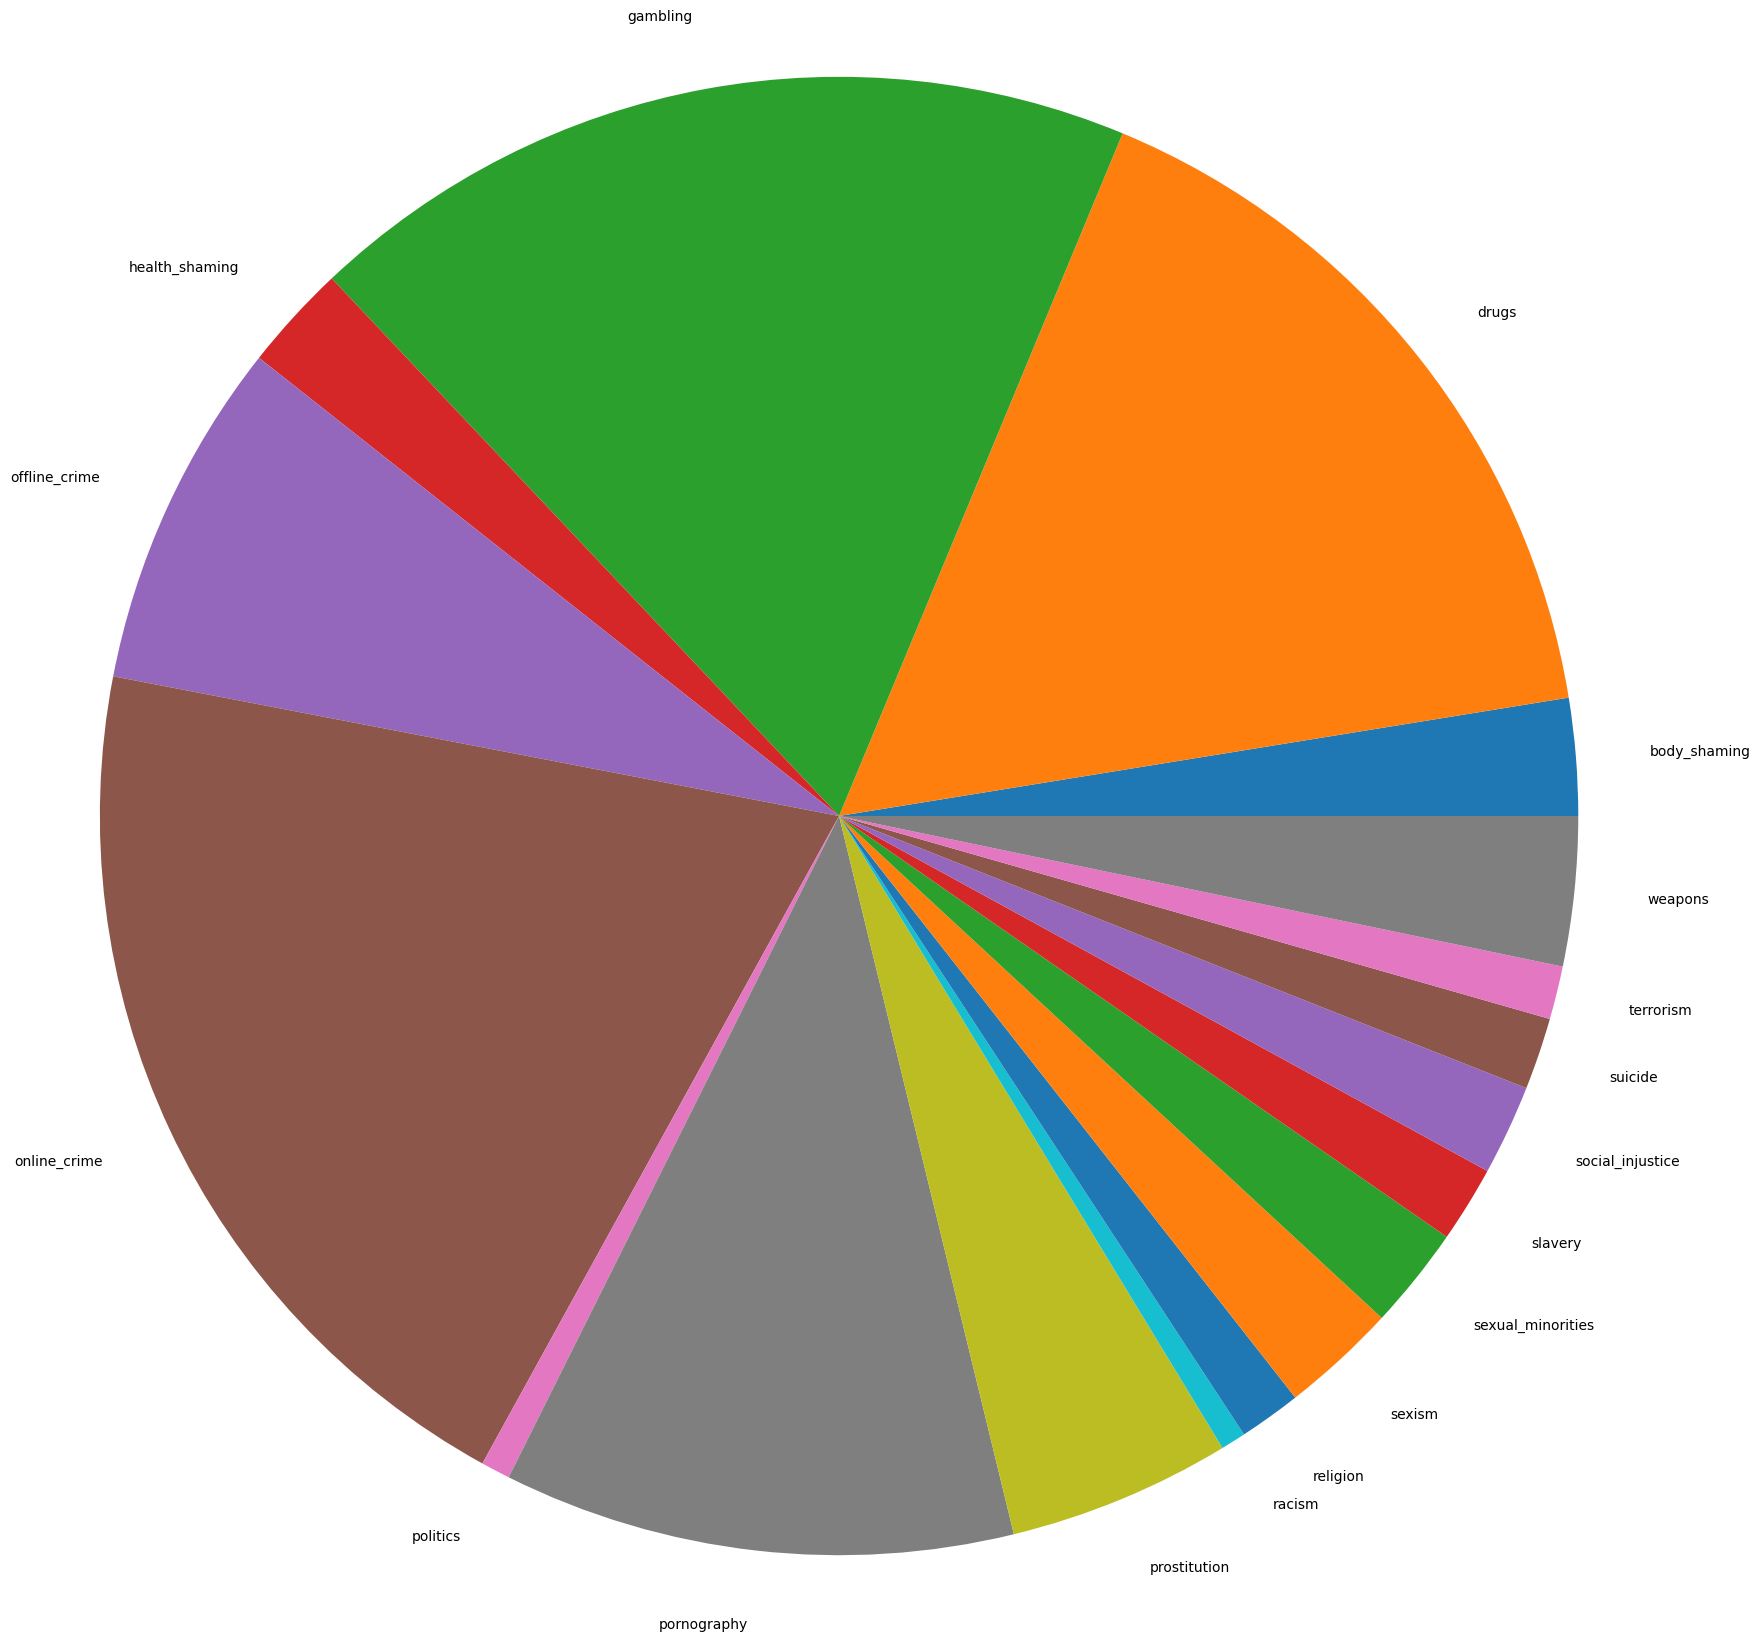

In [30]:
class_counts = np.unique(data_sample['pred_intent'].values, return_counts=True)

plt.pie(class_counts[1], labels=class_counts[0], radius=5)
plt.show()

In [31]:
wrong_pred = data_sample[data_sample["pred_intent"] != data_sample["true_intent"]]
wrong_pred

pattern     true_intent  \
1      Это как с хулиганством ядерным оружием бороться.       terrorism   
5     Права нужны! количество народанасеселения не в...   offline_crime   
6     Я против ничего не имелМысль глубокая, и мне о...  health_shaming   
11    Я вот в детстве мечтала работать на севере на ...    prostitution   
13    Спросил начальника, говорит ШВП пробовали и от...         weapons   
...                                                 ...             ...   
7493  "АУЕ она моя"? или "анальные утехи едины в шах...    prostitution   
7495  Сначала видео. Потом можно сделать фейковую пе...    prostitution   
7496   все перечисленные одинаково никчёмны. Трудное...    prostitution   
7497  Пора прекратить продажу секса . С какого фига ...    prostitution   
7498  Да лучше такСходил как то на корпоративШёл обр...    prostitution   

                                           pred_intents       pred_intent  
1     [{'intent': 'weapons', 'probability': 0.74}, {...           weapons  
5     [{'intent': 'social_injustice', 'probability':...  social_injustice  
6     [{'intent': 'religion', 'probability': 0.3}, {...          religion  
11    [{'intent': 'slavery', 'probability': 0.56}, {...           slavery  
13    [{'intent': 'politics', 'probability': 0.22}, ...          politics  
...                                                 ...               ...  
7493  [{'intent': 'pornography', 'probability': 0.85...       pornography  
7495  [{'intent': 'online_crime', 'probability': 0.5...      online_crime  
7496  [{'intent': 'drugs', 'probability': 0.7116584}...             drugs  
7497  [{'intent': 'sexism', 'probability': 0.6966437...            sexism  
7498  [{'intent': 'drugs', 'probability': 0.26581815...             drugs  

[2390 rows x 4 columns]

In [34]:
num_of_intents = data_sample["true_intent"].nunique()
num_of_phrases = len(data_sample)
average_pred_time = round(total_pred_time / num_of_phrases, 5)

print("Общее время предсказания:", total_pred_time)
print("Количество намерений:", num_of_intents)
print("Общее количество предсказанных фраз:", num_of_phrases)
print(make_text_green_bold(f"Среднее время предсказания: {average_pred_time}"))

Общее время предсказания: 31561

Количество намерений: 18

Общее количество предсказанных фраз: 7500

Среднее время предсказания: 4.20813

In [ ]:
# todo: подобрать максимум Macro avg при пороге как-нибудь?

## Метрики быстродействия

In [35]:
print(classification_report(data_sample["true_intent"], data_sample["pred_intent"], zero_division=0))

precision    recall  f1-score   support

     body_shaming       0.12      0.83      0.22        29
            drugs       0.92      0.79      0.85      1425
         gambling       0.82      0.69      0.75      1634
   health_shaming       0.16      0.79      0.26        34
    offline_crime       0.80      0.49      0.61       937
     online_crime       0.90      0.82      0.86      1645
         politics       0.27      0.57      0.37        23
      pornography       0.89      0.52      0.66      1416
     prostitution       0.18      0.56      0.27       116
           racism       0.34      0.88      0.49        16
         religion       0.20      0.95      0.33        21
           sexism       0.14      0.79      0.24        34
sexual_minorities       0.12      0.75      0.21        28
          slavery       0.14      0.61      0.22        28
 social_injustice       0.14      0.70      0.24        30
          suicide       0.21      0.96      0.35        26
        terrorism       0.26      0.74      0.39        31
          weapons       0.07      0.63      0.12        27

         accuracy                           0.68      7500
        macro avg       0.37      0.73      0.41      7500
     weighted avg       0.83      0.68      0.73      7500

In [36]:
report = classification_report(data_sample["true_intent"], data_sample["pred_intent"], zero_division=0, output_dict=True)

report.keys()
macro_avg_f1 = report.get("macro avg").get("f1-score")
micro_avg_f1 = report.get("accuracy")
weighted_avg_f1 = report.get("weighted avg").get("f1-score")

print(make_text_green_bold(f"Macro avg f1: {macro_avg_f1}"))
print("Micro avg f1:", micro_avg_f1)
print("Weighted avg f1:", weighted_avg_f1)

Macro avg f1: 0.412641241152714

Micro avg f1: 0.6813333333333333

Weighted avg f1: 0.7291789799619027